<a href="https://colab.research.google.com/github/menguelx7/Diplodatos-TP-2/blob/main/Grupo_N%C2%B01_Ejercicio_1_Entregable_Parte_1_EyCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos- Edición 2022**

# GRUPO 1

**Integrantes:** 


*   Laura Ailin Feu Marquestau
*   Matias Miguel Mengual Figueroa 
*   Marcelo Perea
*   Natalia Giselle Tassin
*   Ignacio Villagra Torcomian

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
import plotly.express as px

import seaborn as sns
sns.set_context('talk')
import missingno as msno


#from decouple import config
from sqlalchemy import create_engine, text

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



## **RESPUESTA EJERCICIO 1**

## 1.1

En primer lugar, creamos la base de datos de Melbourne en SQL utilizando la librería SQLalchemy

In [ ]:
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

In [ ]:
melb_df.to_sql('Melbourne', con=engine, if_exists="replace")

2022-06-17 17:33:08,181 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbourne")
2022-06-17 17:33:08,199 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-17 17:33:08,207 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Melbourne")
2022-06-17 17:33:08,214 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-17 17:33:08,231 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-06-17 17:33:08,242 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Melbourne" (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-06-17 17:33:08,259 INFO sqlalchemy.engine.Engine [no key 0.01654s] ()
2022-06-17 17:33:08,318 INFO sql

## 1.2

A continuación, nos traemos la base de Airbnb, tal cual se hizo en clase, y se guarda también en una base de SQL.

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
airbnb_df.to_sql("airbnb",con=engine, if_exists="replace")

2022-06-17 17:33:21,413 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")
2022-06-17 17:33:21,415 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-17 17:33:21,418 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb")
2022-06-17 17:33:21,421 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-17 17:33:21,430 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-06-17 17:33:21,433 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)


2022-06-17 17:33:21,437 INFO sqlalchemy.engine.Engine [no key 0.00401s] ()
2022-06-17 17:33:21,453 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_index ON airbnb ("index")
2022-06-17 17:33:21,457 INFO sqlalchemy.engine.Engine [no key 0.00324s] ()
2022-06-17 17:33:21,471 INFO 

## 1.3

Luego, como se solicita en el punto 3, se realizan las siguientes consultas en SQL:
*   cantidad de registros totales por ciudad.
*   cantidad de registros totales por barrio y ciudad.

In [ ]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
airbnb_df.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

Dado que solo la base de Airnbnb contiene datos de ciudad y barrio, será la única base utilizada para realizar las consultas

**-Cantidad de registros totales por ciudad**

In [ ]:
query1 = "SELECT City, COUNT(*) FROM airbnb GROUP BY City"

In [ ]:
with engine.connect() as con:
  rs = con.execute(query1)
  # print(query1)
  for row in rs:
    print(row)

2022-06-17 17:36:37,644 INFO sqlalchemy.engine.Engine SELECT City, COUNT(*) FROM airbnb GROUP BY City
2022-06-17 17:36:37,646 INFO sqlalchemy.engine.Engine [raw sql] ()
('Banyule', 203)
('Bayside', 375)
('Boroondara', 664)
('Brimbank', 108)
('Cardinia', 123)
('Casey', 153)
('Darebin', 698)
('Frankston', 177)
('Glen Eira', 631)
('Greater Dandenong', 147)
('Hobsons Bay', 239)
('Hume', 170)
('Kingston', 309)
('Knox', 175)
('Manningham', 313)
('Maribyrnong', 436)
('Maroondah', 115)
('Melbourne', 7368)
('Melton', 95)
('Monash', 571)
('Moonee Valley', 344)
('Moreland', 967)
('Nillumbik', 88)
('Port Phillip', 2808)
('Stonnington', 1621)
('Whitehorse', 614)
('Whittlesea', 137)
('Wyndham', 426)
('Yarra', 2049)
('Yarra Ranges', 771)


In [ ]:
# Con el objetivo de realizar un control sobre la consulta anterior, ejecutamos una consulta similar sin utilizar SQL
#Se observa el mismo resultado.  
airbnb_df.groupby('city')['city'].count()

city
Banyule               203
Bayside               375
Boroondara            664
Brimbank              108
Cardinia              123
Casey                 153
Darebin               698
Frankston             177
Glen Eira             631
Greater Dandenong     147
Hobsons Bay           239
Hume                  170
Kingston              309
Knox                  175
Manningham            313
Maribyrnong           436
Maroondah             115
Melbourne            7368
Melton                 95
Monash                571
Moonee Valley         344
Moreland              967
Nillumbik              88
Port Phillip         2808
Stonnington          1621
Whitehorse            614
Whittlesea            137
Wyndham               426
Yarra                2049
Yarra Ranges          771
Name: city, dtype: int64

**-Cantidad de registros totales por barrio y ciudad**

In [ ]:
query2 = "SELECT city, neighborhood, COUNT(*) FROM airbnb GROUP BY city, neighborhood"

In [ ]:
with engine.connect() as con:
  rs = con.execute(query2)
  for row in rs:
    print(row)

2022-06-17 17:41:59,494 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, COUNT(*) FROM airbnb GROUP BY city, neighborhood
2022-06-17 17:41:59,504 INFO sqlalchemy.engine.Engine [raw sql] ()
('Banyule', None, 174)
('Banyule', 'Alphington', 16)
('Banyule', 'Preston', 8)
('Banyule', 'Thornbury', 5)
('Bayside', None, 170)
('Bayside', 'Bentleigh', 1)
('Bayside', 'Brighton', 203)
('Bayside', 'Elwood', 1)
('Boroondara', None, 30)
('Boroondara', 'Ashburton', 14)
('Boroondara', 'Balwyn', 70)
('Boroondara', 'Balwyn North', 40)
('Boroondara', 'Camberwell', 82)
('Boroondara', 'Canterbury', 24)
('Boroondara', 'Glen Iris', 32)
('Boroondara', 'Hawthorn', 261)
('Boroondara', 'Kew', 109)
('Boroondara', 'Malvern', 2)
('Brimbank', None, 108)
('Cardinia', None, 123)
('Casey', None, 153)
('Darebin', None, 112)
('Darebin', 'Alphington', 22)
('Darebin', 'Coburg', 4)
('Darebin', 'Northcote', 303)
('Darebin', 'Preston', 156)
('Darebin', 'Thornbury', 101)
('Frankston', None, 177)
('Glen Eira', None, 33)


In [ ]:
# Tal como se hizo previamente, se repite la consulta sin utilizar SQL y se observan los mismos resultados
airbnb_df.groupby(['city','neighborhood'])[['city']].count()

city
city    neighborhood        
Banyule Alphington        16
        Preston            8
        Thornbury          5
Bayside Bentleigh          1
        Brighton         203
...                      ...
Yarra   East Melbourne     8
        Fitzroy          381
        Fitzroy North    225
        Northcote          6
        Richmond         547

[104 rows x 1 columns]

## 1.4
Combinación de los dataset

Para finalizar, se combinan ambos datasets (Melbourne y Airnbnb) utilizando la función JOIN de SQL. Para ello, se considera la columna Postcode de la base de Melbourne y Zipcode de la base de Airbnb que representan los mismos datos tal como se muestra a continuación:

In [ ]:
query3 = 'SELECT *, a.price, a.weekly_price, a.monthly_price FROM Melbourne LEFT JOIN airbnb a ON Melbourne.Postcode = a.zipcode'

El siguiente código se dejará comentado para evitar problemas en la ejecución.

In [ ]:
"""with engine.connect() as con:
  rs = con.execute(query3)
  for row in rs:
    print(row)"""

'with engine.connect() as con:\n  rs = con.execute(query3)\n  for row in rs:\n    print(row)'

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

## 2.1 

En primer lugar, realizamos un análisis general de la base de Melbounre para familiarizarnos un poco más con los datos.

In [ ]:
melb_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
melb_df.shape

(13580, 21)

In [ ]:
melb_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Luego de este primer pantallazo, se realiza un análisis de correlación para ver con qué variables correlaciona el valor (columna "precio") de la propiedad

In [ ]:
melb_df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


De la matriz de correlación podemos obtener los siguientes resultados:

*   Existe una correlación positiva (0.496634) entre el valor de la propiedad y la cantidad de habitaciones ("Rooms") que tiene.
*   Existe una correlación negativa (-0.162522) entre el valor de la propiedad y la distancia que la separa del centro financiero/ de negocios de Melbourne ("Distance").
*   Existe una correlación positiva (0.475951) entre el valor de la propiedad y el número de dormitorios ("Bedroom2") que tiene.
*   Existe una correlación positiva (0.467038) entre el valor de la propiedad y el número de baños ("Bathroom") que tiene.
*   Existe una correlación positiva (0.238979) entre el valor de la propiedad y el número lugares para autos ("Car") que tiene.
*   Existe una correlación negativa (-0.323617) entre el valor de la propiedad y el año en el que fue construida ("YearBuilt").


Por razones de simplicidad, no se consideraron las correlaciones inferiores a 0.15 (en valor absoluto) ni las variables de latitud y longitud por tener que ser analizadas en conjunto.

Posteriormente, se utiliza el test de Pearson para contrastar la significancia de dichas correlaciones. En todos los casos, el p-value es inferior a 0.05 por lo que rechazaríamos la hipótesis nula de no correlación entre las variables y confirmaríamos las correlaciones son estadísticamente significativas al 5%. 

In [ ]:
pearsonr(melb_df['Price'], melb_df['Rooms'])

(0.4966336761865301, 0.0)

In [ ]:
pearsonr(melb_df['Price'], melb_df['Distance'])

(-0.1625218378638254, 4.99650671641541e-81)

In [ ]:
pearsonr(melb_df['Price'], melb_df['Bedroom2'])

(0.4759510323766222, 0.0)

In [ ]:
pearsonr(melb_df['Price'], melb_df['Bathroom'])

(0.4670381828201492, 0.0)

El test de Pearson no se puede realizar cuando las columnas tienen valores nulos, como son los casos de los campos "Car" y "YearBuilt". Por lo tanto, procedimos a calcular dichos coeficientes con dos bases alternativas sin valores nulos en esas columnas para testear la significancia de la correlación.

In [ ]:
melb_clean_car = melb_df[melb_df['Car'].notnull()]

In [ ]:
pearsonr(melb_clean_car['Price'], melb_clean_car['Car'])

(0.23897929981238059, 7.274717945010224e-175)

In [ ]:
melb_clean_year = melb_df[melb_df['YearBuilt'].notnull()]

In [ ]:
pearsonr(melb_clean_year['Price'], melb_clean_year['YearBuilt'])

(-0.32361669910916346, 2.3897942618878167e-199)

Ambos coeficientes resultan estadísticamente significativos, por lo que concluimos que todas las columnas consideradas pueden ser relevantes para predecir el valor de una propiedad.

También se analizan dichas correlaciones en forma gráfica. 

In [ ]:
fig = px.scatter(melb_df, x=melb_df['Rooms'], y=melb_df['Price'])
fig = px.scatter(melb_df, x=melb_df['Rooms'], y=melb_df['Price'], trendline="ols")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
fig = px.scatter(melb_df, x=melb_df['Distance'], y=melb_df['Price'])
fig = px.scatter(melb_df, x=melb_df['Distance'], y=melb_df['Price'], trendline="ols")
fig.show()

In [ ]:
fig = px.scatter(melb_df, x=melb_df['Bedroom2'], y=melb_df['Price'])
fig = px.scatter(melb_df, x=melb_df['Bedroom2'], y=melb_df['Price'], trendline="ols")
fig.show()

In [ ]:
fig = px.scatter(melb_df, x=melb_df['Bathroom'], y=melb_df['Price'])
fig = px.scatter(melb_df, x=melb_df['Bathroom'], y=melb_df['Price'], trendline="ols")

fig.show()

In [ ]:
fig = px.scatter(melb_df, x=melb_df['Car'], y=melb_df['Price'])
fig = px.scatter(melb_df, x=melb_df['Car'], y=melb_df['Price'], trendline="ols")

fig.show()

In [ ]:
fig = px.scatter(melb_df, x=melb_df['YearBuilt'], y=melb_df['Price'])
fig = px.scatter(melb_df, x=melb_df['YearBuilt'], y=melb_df['Price'], trendline="ols")
fig.show()

Se llega a las mismas cconclusiones. 

**Búsqueda de valores extremos**

In [ ]:
main_var = ['Rooms', 'Distance','Bedroom2', 'Bathroom', 'Car', 'YearBuilt']

Para encontrar los valores extremos de cada una de las columnas que fueron seleccionadas como relevantes para predecir el valor de la propiedad, procedemos a graficar box plots de cada una de las variables. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



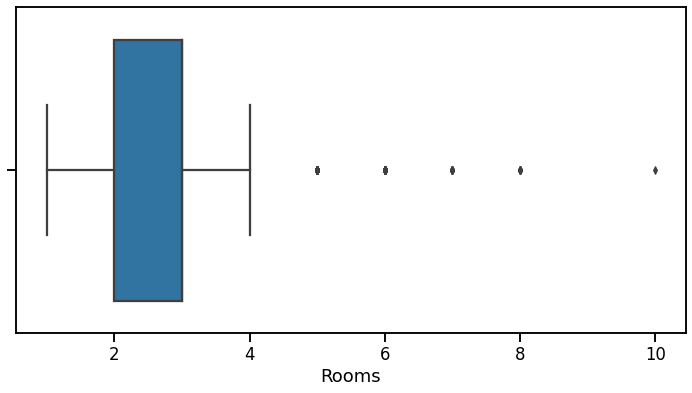

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(melb_df['Rooms'])
plt.ticklabel_format(style='plain', axis='x')

En el gráfico se observa que las propiedades con más de 4 habitaciones se consideran outliers. Por lo tanto, se dejarán afuera del dataset

En el caso de la distancia, en el box plot se puede observar que los valores mayores a 23 aproximadamente podrían considerarse outliers. Luego, calculamos que estos datos representan solo el 3% de los datos de distancia, por lo que podrían eliminarse de la base.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



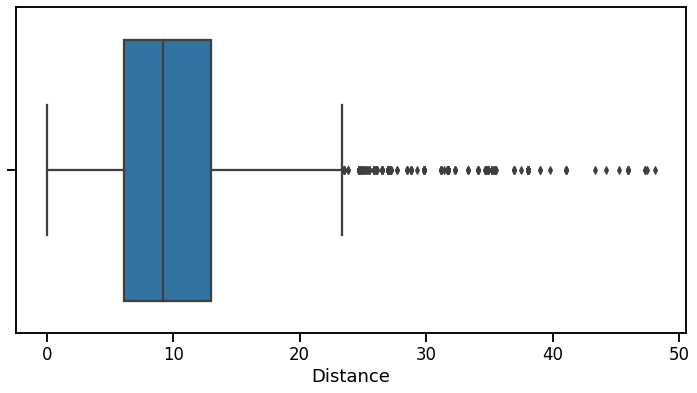

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(melb_df['Distance'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
len(melb_df[melb_df['Distance']>23])/len(melb_df['Distance'])

Se repite el procedimiento para el resto de las columas. 

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(melb_df['Bedroom2'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(melb_df['Bathroom'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(melb_df['Car'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(melb_df['YearBuilt'])
plt.ticklabel_format(style='plain', axis='x')

En el caso de la columna YearBuilt, que como vimos antes tiene muchos valores nulos, solo se eliminan las dos filas que tienen datos de outliers de los aoñs 1196 y 1830.

In [ ]:
len(melb_df[melb_df['YearBuilt']<1850])/len(melb_df['YearBuilt'])

In [ ]:
melb_df[melb_df['YearBuilt']<1850]

Luego, se crea un nuevo dataset "melb_clean_df" donde se limpiaron todos los valores extremos antes mencionados.

In [ ]:
melb_clean_df = melb_df[(melb_df['Rooms']<=4) & (melb_df['Distance']<=23) & (melb_df['Bedroom2']> 0) & (melb_df['Bedroom2']< 5) & (melb_df['Bathroom']< 4) &
                        (melb_df['Car']< 4) & (melb_df['YearBuilt']!= 1830) & (melb_df['YearBuilt']!= 1196)
                        ]

In [ ]:
melb_clean_df.shape

## 2.2

Para este punto, se utiliza la base de Airbnb que descargamos en el ejercicio anterior.

In [ ]:
airbnb_df.head()

La combinación de ambos datasets se hará utilizando las columnas postode y zipcode, que represetan lo mismo. En la base de Airbnb observamos que el valor de zipcode está escrito de diferentes formas por lo que procedemos a corregir este error.

In [ ]:
airbnb_df.zipcode.value_counts().head()

In [ ]:
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
airbnb_df.zipcode.value_counts()

Calculamos algunas medidas descriptivas de la base tomando la columna precio para obtener, entre otras cosas, la media y la mediana.

In [ ]:
airbnb_df['price'].describe()

Realizamos un groupby por zipcode para tomar la media de las columnas que nos interesan de la base de Airbnb

In [ ]:
airbnb_df.groupby('zipcode')[['price', 'weekly_price', 'monthly_price']].mean()

Las 3 columnas que consideramos relevantes de la base de Airbnb para sumar a la base original de Melbourne son : price, weekly_price y monthly_price

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

In [ ]:
airbnb_df[relevant_cols + ['zipcode']]\
  .groupby(['zipcode']).mean().reset_index()[:5]

De la columna price consideramos la media, mediana y la cantidad de filas. De las columnas weekly price y monthly price, solo consideramos la media.

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby(['zipcode'])\
  .agg({'price': ['mean', 'median', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price median': 'airbnb_price_median',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)

## Option 2
# Pass as argument name the new name of the column, and as value a tuple where
# the first value is the original column and the second value is the operation.
# airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
#   .agg(airbnb_record_count=('price', 'count'),
#        airbnb_price_mean=('price', 'mean'),
#        airbnb_weekly_price_mean=('weekly_price', 'mean'),
#        airbnb_monthly_price_mean=('monthly_price', 'mean'))\
#   .reset_index()

airbnb_price_by_zipcode[:3]

In [ ]:
airbnb_price_by_zipcode.to_csv("airbnb_price_by_zipcode.csv", index=None)

In [ ]:
from google.colab import files
files.download('airbnb_price_by_zipcode.csv') 

In [ ]:
merged_sales_df = melb_clean_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df.sample(5)

In [ ]:
merged_sales_df.shape

In [ ]:
merged_sales_df.to_csv("melb_data_extended.csv", index=None)

In [ ]:
from google.colab import files
files.download('melb_data_extended.csv') 

In [ ]:
merged_sales_df.head(5)

Otras columnas que se encuentran tanto en la base de Melbourne como en la de Airbnb que podrían haber servido para combinar los datasets son las de latitud y longitud. Pero como se puede observar en los resultados de abajo, los porcentajes de los valores de intersección para ambas columnas son muy bajos. Esto puede deberse porque la forma en que están presentados, ya que se escriben con muchos decimales y es difícil que coincidan exactamente. Por ende, no sería recomendable utilizarlos.

In [ ]:
intersection = np.intersect1d(
    airbnb_df.latitude.values, melb_clean_df.Lattitude.values, assume_unique=False)
print("Airbnb unique latitude", len(airbnb_df.latitude.unique()))
print("Sales unique latitude", len(melb_clean_df.Lattitude.unique()))
print("Common latitude", len(intersection))

In [ ]:
intersection = np.intersect1d(
    airbnb_df.longitude.values, melb_clean_df.Longtitude.values, assume_unique=False)
print("Airbnb unique latitude", len(airbnb_df.longitude.unique()))
print("Sales unique latitude", len(melb_clean_df.Longtitude.unique()))
print("Common latitude", len(intersection))

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
merged_sales_df.to_csv("melb_data_extended.csv", index=None)

In [ ]:
from google.colab import files
files.download('melb_data_extended.csv') 

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)